Wine Quality Data Set:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Predicting the Quality of Red Wines

By: Jaskaran Singh, Justin Wong, Matthew Gillies, Shehab Khan

# Introduction

For those who drink wine, knowing the alcohol content of the wine is often very important to them. The alcohol content of both red and white wines are a quality of interest for both consumers and producers. In our study, we compare the mean alcohol content of wines from red and white wine datasets. Our first data set contains 1599 red wines with data on their composition and quality. The other data set contains 4898 white wines with data on their composition and quality. We will perform a hypothesis test comparing the mean alcohol content of the 2 types of wine and obtain a confidence interval of the difference of means of alcohol content in the two types of wine(red and white). We plan to estimate this confidence interval using asymptotics and will compare the two techniques. We additionally plan to analyze the quantiles for the alcohol concentration in red and white wine.

## Attribute Information 
- `fixed acidity` - Primary fixed acids found in wine such as tartaric and malic acid. 
- `volatile acidity` - It is the gaseous acids present in the wine 
- `citric acid` - It is a weak organic fluid, found in citrus fruits naturally
- `residual sugar` - Amount of sugar left after fermentation 
- `chlorides` - Amount of salt present in wine 
- `free sulfur dioxide` - So2 is used for prevention of wine by oxidation and microbial spoilage 
- `total sulfur dioxide`
- `density` - The density of the wine 
- `pH` - Used for checking the amount of acidity 
- `sulphates` - Additional sulfites preserve the freshness and protects the wine from oxidation and bacteria 
- `alcohol` - Percent of alcohol present in the wine
- `quality` - Output variable 



# Preliminary Results

In [1]:
suppressPackageStartupMessages({
library(cowplot)
library(digest)
library(gridExtra)
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
library(infer)
})


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
# Read the two dataset(red wine and white wine csv) into jupyter notebook

wine_quality <- read_delim('winequality-red.csv', show_col_types = FALSE)
names(wine_quality) <- make.names(names(wine_quality), unique = TRUE)

wine_quality <- cbind(wine_quality, type = "red")


wine_quality_white <- read_delim('winequality-white.csv', show_col_types = FALSE)
names(wine_quality_white) <- make.names(names(wine_quality_white), unique = TRUE)

wine_quality_white <- cbind(wine_quality_white, type = "white")

# Now we would combine the two datasets based on the type of wine(red and white)

combined_data <- rbind(wine_quality, wine_quality_white)
head(combined_data) 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


## Observed means for alcohol content in red and white wine
A random sample of size 100 was taken from each dataset and the average alcohol content was estimated for both red and white wine.

In [39]:
set.seed(4242)

#Taking a sample of size 100 from the dataset

#red wine sample
alcohol_sample <- wine_quality %>% 
    rep_sample_n(size = 100, replace = FALSE) %>% 
    select(alcohol)

#white wine sample
alcohol_white_sample <- wine_quality_white %>% 
     rep_sample_n(size = 100, replace = FALSE) %>% 
     select(alcohol)


#Calculate the mean of alcohol content from the red wine sample 
observed_alc_mean <- alcohol_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

#Calculate the mean of alcohol content from the white wine sample
observed_alc_white_mean <- alcohol_white_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

observed_alc_mean
observed_alc_white_mean



Adding missing grouping variables: `replicate`
Adding missing grouping variables: `replicate`


stat
<dbl>
10.2775


stat
<dbl>
10.429


It can be estimated that the mean alcohol content in red wine is 10.277(vol.%) and the mean alcohol content in white wine is 10.429(vol.%)

## Investigation on Quantiles for the alcohol content in red and white wine 

In [40]:
## Take a sample of the datasets and select the variable of interest (alcohol)
sample <- wine_quality %>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)

sample_white <- wine_quality_white %>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)


In [42]:
## Calculate 0.25th and 0.75th quantiles

#0.25th quantile for red wine 
lower_quantile <- sample %>%
    pull(alcohol) %>%
    quantile(0.25)

#0.75th quantile for red wine
upper_quantile <- sample %>%
    pull(alcohol) %>%
    quantile(0.75)

#0.25th quantile for white wine 
lower_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.25)

#0.75th quantile for white wine 
upper_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.75)

# difference of upper and lower quantile for red wine 
iqr <- upper_quantile - lower_quantile

#difference of upper and lower quantile for white wine 
iqr_white <- upper_quantile_white - lower_quantile_white



lower_quantile #0.25th quantile for red wine 
upper_quantile #0.75th quantile for red wine
lower_quantile_white #0.25th quantile for white wine 
upper_quantile_white #0.75th quantile for white wine 
iqr # difference of upper and lower quantile for red wine 
iqr_white #difference of upper and lower quantile for white wine 

25% 
9.5

75% 
 11

25% 
9.4

75% 
11.325

75% 
1.5

75% 
1.925

From the values produced above we see that the alcohol content in white wine is not equal to the alcohol content in red wine. 

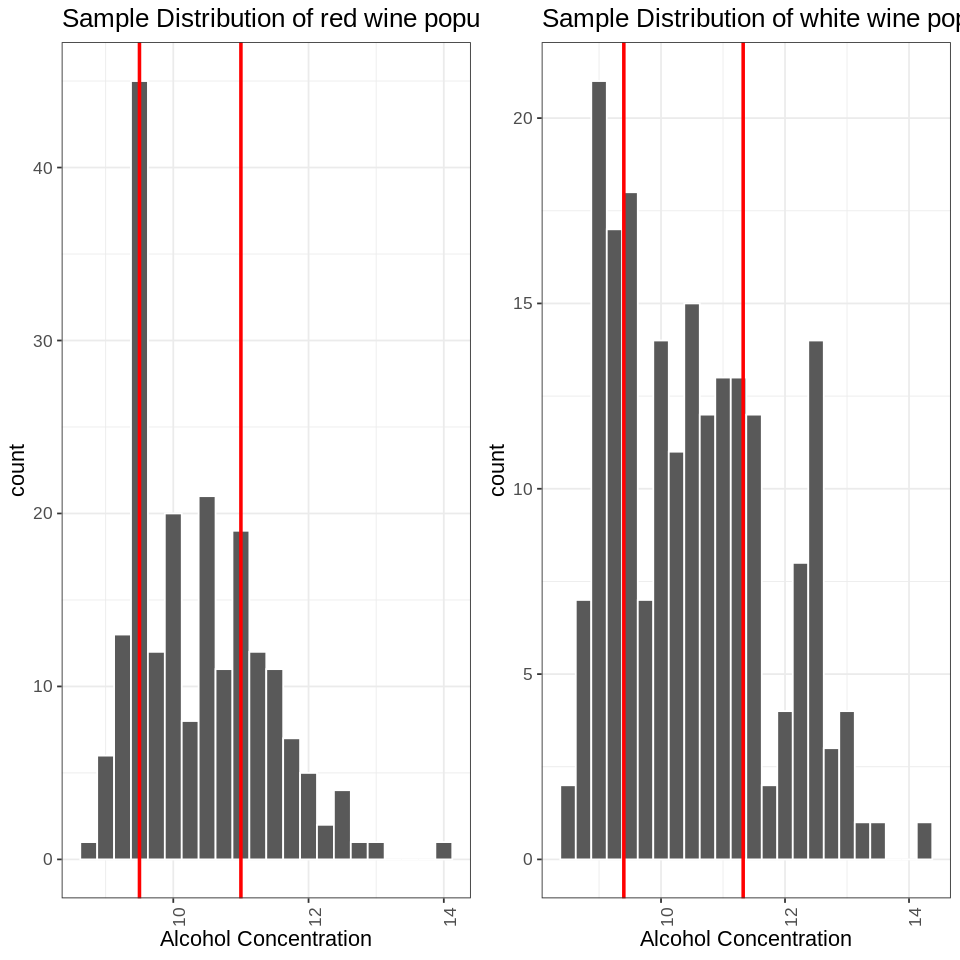

In [46]:
options(repr.plot.width = 8, repr.plot.height = 8)
## Plot the distribution of the sample with quantiles 
quantile_plot <- 
    sample %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile, colour = "red", size = 1) +
    labs(title = "Sample Distribution of red wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(text = element_text(size = 13))

quantile_plot_white <- 
    sample_white %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile_white, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile_white, colour = "red", size = 1) +
    labs(title = "Sample Distribution of white wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(text = element_text(size = 13))



plots_row <- plot_grid(quantile_plot + 
                           theme(axis.text.x = element_text(angle = 90)),

                           quantile_plot_white +  
                           theme(axis.text.x = element_text(angle = 90)), 
                           ncol = 2)

dist_grid <- plot_grid(plots_row, 
                        rel_heights = c(0.5, 1))

dist_grid


After examining the histograms, we can refute our previous statement, as it seems there is an usual amount of 
values around the point 9.5. It seems that the sample taken from the red wine population is slightly right-skewed, which explains the larger IQR. Therefore we are able to estimate that the variance of alcohol in red wine and alcohol in white wine are approximately similar. To test this observation we will conduct a hypothesis test examining to see if the difference in means of the alcohol contents are significant with a 5% significance level.


# Methods and Results
## Methods: Plan
This dataset is trustworthy since it comes from a reliable source since it was from a database recommended on the course page. Moreover, an academic paper was written on this data, further suggesting that it is a reliable source of data.
To summarize what we have analyzed above, using sampling we estimated the observed mean alcohol content for both red and white wines. Additionally, we analyzed the IQR of the alcohol content of both types of wine to check the differences in alcohol content. From this we observed that the alcohol contents of both wines were fairly similar. However, to test the significance of this difference we conducted a hypothesis test on these variables. 

We conducted a hypothesis test using the infer package wherein the null hypothesis states that there is no significant difference between average alcohol amount in red wine and average alcohol amount in white wine. We further plan to include a 95% confidence interval for the difference in means. 

## Expected Outcomes Significance
### What do you expect to find?
We expect to find the p-value at 5% significance level using the hypothesis test. If the p-value comes out to be less than 0.05, we would reject the null hypothesis. 
### What impact could such findings have?
These findings could provide insights for wine making companies as well as consumers regarding what the alcohol content in wines are.
### What future questions could this lead to?
The study can be further analyzed by possibly exploring the relation between alcohol content and the other variables in the dataset. We could see if any of the other variables are correlated with the alcohol concentration to help make a regression model in future. 

## Results
## Hypothesis Test
H<sub>0</sub> : There is no significant difference between average alcohol amount in red wine and average alcohol amount in white wine (alcohol content of red wine - alcohol content of white wine)

H<sub>A</sub> : There is significant difference between average alcohol amount in red wine and average alcohol amount in white wine

In [8]:
# First we select the columns of interest from the data
alcohol_data <-
combined_data %>% 
select(alcohol, type) %>% 
filter(!is.na(alcohol))
head(alcohol_data)

,alcohol,type
,<dbl>,<chr>
1,9.4,red
2,9.8,red
3,9.8,red
4,9.8,red
5,9.4,red
6,9.4,red


In [9]:
# Next we count the amount of each type
wines_count <-
    alcohol_data %>% 
    count(type)
wines_count

type,n
<chr>,<int>
red,1599
white,4898


In [10]:
# Next we calculate the observed test statistic using the inferpackage
obs_diff_in_means <- 
    alcohol_data  %>% 
    specify(formula = alcohol ~ type) %>%
    calculate(stat = "diff in means", order = c("red", "white"))
obs_diff_in_means

stat
<dbl>
-0.09128393


In [11]:
set.seed(1234)

# We generate 1000 samples from the null distribution
null_diff_in_means <- 
    alcohol_data %>% 
    specify(formula = alcohol ~ type) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("red", "white"))
head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,0.01655833
2,0.01361893
3,0.02062868
4,0.06468639
5,-0.05336770
6,0.03065248


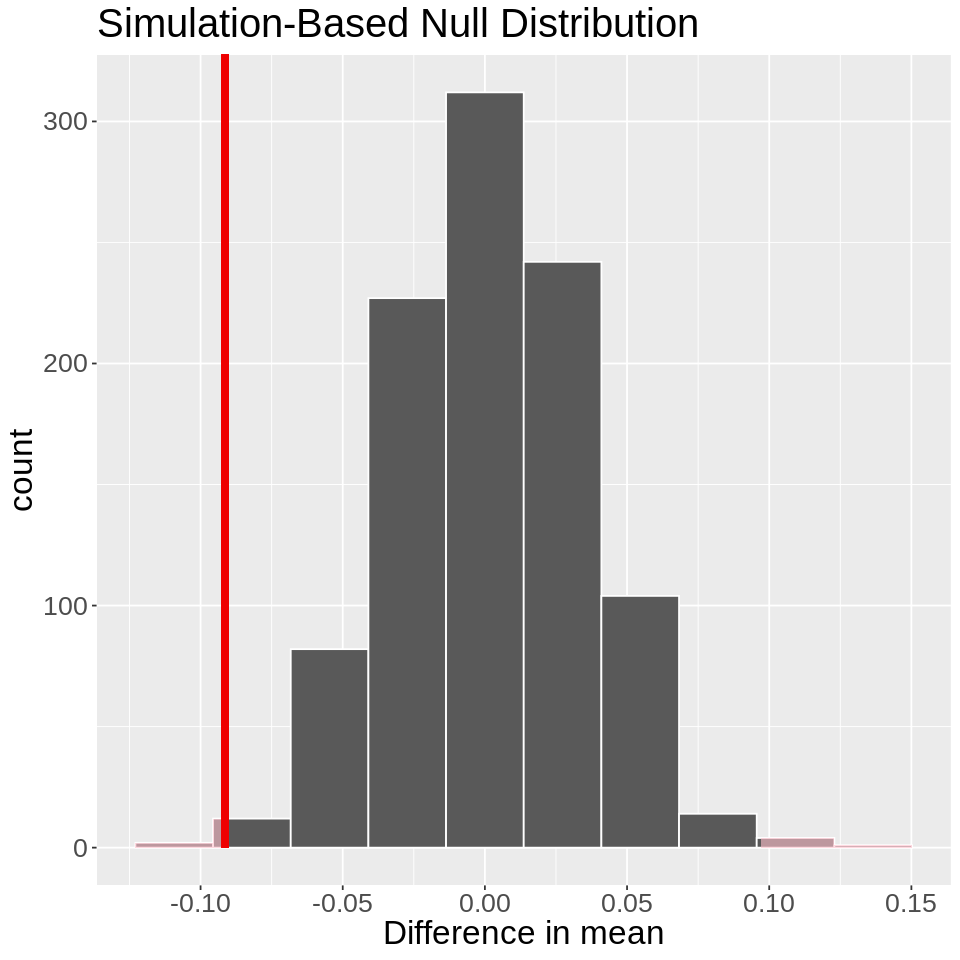

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Plot results of hypothesis test and observe the test-statistic using the vertical bar 
diff_in_means_plot <-
    visualize(null_diff_in_means, bins = 10) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
    xlab("Difference in mean") +
    theme(text = element_text(size = 20))
diff_in_means_plot

The above distribution shows the null distribution of the difference in means and where the test statistic lies. This distribution makes our analysis stronger since there is hardly any shaded region, suggesting that the likelihood of the null hypothesis being true is quite small. If the null hypothesis was true, the shaded area would be much larger. 

In the next step we find the p-value 

In [13]:
# Finding the p-value
p_value <-
    null_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "both")
p_value

p_value
<dbl>
0.006


We obtain a p-value of 0.006. At 5% significance level(0.05), we reject the null hypothesis since the observed p-value is less than the significance level. Based on the hypothesis test, we are 95% confident that the alcohol content of white wine is not equal to the alcohol content of red wine. Based on previous calculations we can estimate that white wine would have a higher mean alcohol content of 10.429(vol.%) as compared to red wine that has a mean alcohol content of 10.277(vol.%). 


### 95% Confidence Interval for difference in means 

For this, we would be finding the 95% confidence interval for the difference in means to check whether the observed value of difference in means i.e -0.0912 lies within the bounds of the interval. 

In [14]:
# Finding bootstrap distribution for the difference in means 
diff_in_means_bootstrap_dist <- 
    alcohol_data %>%
    specify(formula = alcohol ~ type) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("red", "white"))  
head(diff_in_means_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,-0.11878094
2,-0.09095718
3,-0.03980163
4,-0.08361723
5,-0.09723834
6,-0.10852688


In [16]:
# Finding the 95% confidence interval
diff_in_means_ci <- 
    diff_in_means_bootstrap_dist %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
diff_in_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.1514882,-0.02914259


<b>Lower Bound : -0.1514</b>

<b>Upper Bound : -0.0291</b>

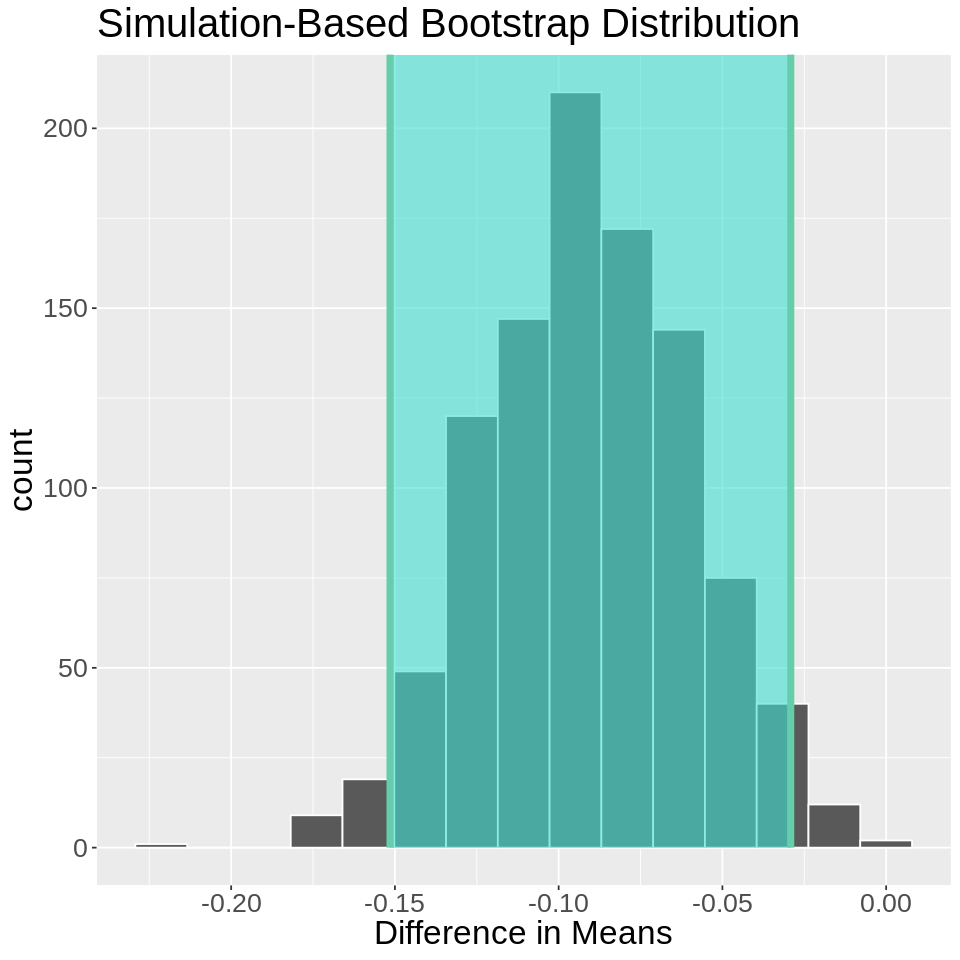

In [17]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Plotting the difference in means
diff_in_means_ci_plot <-
    visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")
diff_in_means_ci_plot

From the distribution, it can be concluded that observed value of difference in means i.e -0.09128 is contained inside the confidence interval. This means that if we keep on taking repeated samples, we are 95% confident that the observed value would lie inside the confidence interval.

# References
Zhang, Qing-An, et al. “Preliminary Study of the Effect of Ultrasound on Physicochemical Properties of Red Wine.” CyTA - Journal of Food, vol. 14, no. 1, 2015, pp. 55–64., https://doi.org/10.1080/19476337.2015.1045036.

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.